We are going to solve this boundary value problem
$$y'' + 3yy' = 0, \quad y(0) = 0\,\quad y(2) = 1$$

In [64]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

Now, we know that

$$y'(x_i) = \frac{y(x_{i+1}) - y(x_{i-1})}{2dx}$$

We also know that
$$y''(x_i) = \frac{y'(x_{i+1}) - y'(x_{i-1})}{2dx}$$

Substituting $y'(x_{i+1})$ and $y'(x_{i-1})$, we acquire
$$y''(x_i) = \frac{\frac{y(x_{i+2}) - y(x_{i})}{dx} - (\frac{y(x_{i}) - y(x_{i-2})}{2dx})}{2dx}$$



Then, we acquire
$$y''(x_i) = \frac{y(x_{i+2}) - 2y(x_{i}) + y(x_{i-2})}{4dx^2}$$

In [65]:
def deq_val(y, a = 0, b = 1):

    h = 2.0/(len(y)-1) # To calculate the h
    # do dy
    dy = np.zeros_like(y)
    dy[0] = (y[1] - y[0])/h
    dy[-1] = (y[-1] - y[-2])/h
    dy[1:-1] = (y[2:]-y[0:-2])/(2*h)
    # do ddy
    ddy = np.zeros_like(y)
    ddy[0] = (dy[1] - dy[0])/h
    ddy[-1] = (dy[-1] - dy[-2])/h
    ddy[1:-1] = (dy[2:]-dy[0:-2])/(2*h)

    val = ddy + 3*y*dy
    val[0] = y[0]-a
    val[-1] = y[-1]-b
    return val

In [66]:
# Initial value
N = 100
y0 = np.random.random(N)
x0 = np.linspace(0,2,N)

solution = fsolve(deq_val, y0)

In [67]:
print(solution)

[2.69524558e-21 3.06110604e-02 6.11653039e-02 9.16062316e-02
 1.21878391e-01 1.51927258e-01 1.81700347e-01 2.11146637e-01
 2.40218039e-01 2.68868342e-01 2.97055029e-01 3.24737724e-01
 3.51880348e-01 3.78449063e-01 4.04414762e-01 4.29750511e-01
 4.54434381e-01 4.78446389e-01 5.01771687e-01 5.24397011e-01
 5.46314239e-01 5.67516362e-01 5.88001431e-01 6.07768057e-01
 6.26819768e-01 6.45160050e-01 6.62797131e-01 6.79738569e-01
 6.95996488e-01 7.11581708e-01 7.26509457e-01 7.40793033e-01
 7.54450024e-01 7.67495487e-01 7.79948693e-01 7.91825807e-01
 8.03147191e-01 8.13929561e-01 8.24193864e-01 8.33956889e-01
 8.43239760e-01 8.52058950e-01 8.60435429e-01 8.68385044e-01
 8.75928364e-01 8.83080371e-01 8.89861051e-01 8.96284342e-01
 9.02369531e-01 9.08129386e-01 9.13582423e-01 9.18740156e-01
 9.23620307e-01 9.28233082e-01 9.32595421e-01 9.36716191e-01
 9.40611588e-01 9.44289133e-01 9.47764337e-01 9.51043377e-01
 9.54141155e-01 9.57062514e-01 9.59821839e-01 9.62422648e-01
 9.64878914e-01 9.671928

In [68]:
print(deq_val(solution))

[ 2.69524558e-21 -6.76033535e-10  7.00662639e-10 -1.89476768e-11
  6.81238177e-10  2.97120772e-10  1.11222909e-09  3.02320391e-10
 -5.90678839e-10 -2.48643173e-09  8.98870534e-10 -2.62759303e-09
  7.10450143e-10 -2.95330982e-09  2.64857491e-09  5.86398330e-09
 -5.75805847e-10 -6.63002098e-09 -5.38323386e-09  1.01471189e-08
  6.14036400e-09 -5.06777975e-09 -1.64135194e-09  1.70545378e-09
 -1.32257938e-09  7.65363084e-09 -6.99112213e-09 -2.56406607e-09
  5.58985347e-09  2.02613037e-10 -2.88093083e-09 -2.92030022e-09
  1.38218215e-09  9.24266441e-10 -1.48732160e-09  3.08890913e-10
 -6.52899068e-10 -1.57321844e-09  4.44425030e-09 -2.40022957e-09
 -2.17068474e-09  2.76992873e-10  6.51710308e-09  1.95729499e-09
 -4.84517637e-09 -1.33579331e-08  1.28295259e-08  1.53828172e-09
  3.39561823e-10 -5.93771809e-10 -5.30737010e-09 -1.19813293e-09
  2.23744234e-09  3.85752996e-09 -5.22241217e-09 -1.77961867e-09
  3.80451448e-10 -7.60005392e-11  3.74502618e-09  1.56999724e-09
 -2.41363274e-09  9.18300

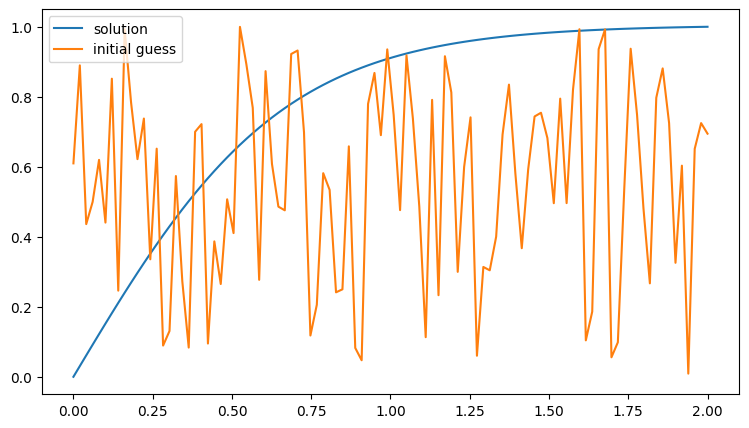

In [69]:
fig, ax = plt.subplots(figsize = (9,5))
ax.plot(x0,solution, label = "solution")
ax.plot(x0,y0, label = "initial guess")
ax.legend()

Second example

In [70]:
N_x = 100
N_y = 100

field = np.zeros((N_x,N_y))

# Define the boundary values